<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Просмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Решение-дисбаланса-классов" data-toc-modified-id="Решение-дисбаланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Решение дисбаланса классов</a></span></li><li><span><a href="#Подбор-метода-векторизации" data-toc-modified-id="Подбор-метода-векторизации-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подбор метода векторизации</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Предсказания-на-тестовой-выборке" data-toc-modified-id="Предсказания-на-тестовой-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предсказания на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели.
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

# Описание данных

**Целевой признак** - toxic

`text` - текст комментария

`toxic` - принимает значения 0 / 1 (положительный / отрицательный)

### Загрузка библиотек

In [ ]:
!conda install --yes Pillow wordcloud tqdm pandarallel imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [ ]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score



In [ ]:
# импорт библиотек

#!pip install --upgrade pip


In [ ]:

# !pip install --upgrade Pillow


In [ ]:

# !pip install wordcloud

In [ ]:
# !pip install tqdm

from tqdm.notebook import tqdm

In [ ]:
# !pip install pandarallel

from pandarallel import pandarallel
tqdm.pandas(desc="progress")
pandarallel.initialize(progress_bar = True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
nltk.download('stopwords')
#nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from wordcloud import WordCloud

In [ ]:
# убираем ошибки из-за возможно устаревшей версии sklearn

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# !pip install -U imbalanced-learn

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.base import OneToOneFeatureMixin

In [ ]:
from sklearn.compose import(
    make_column_selector,
    make_column_transformer,
    ColumnTransformer)

### Просмотр данных

In [ ]:
# чтение и загрузка файла - основной датасет

comment = pd.read_csv('/datasets/toxic_comments.csv')
display(comment.head())
comment.shape

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


(159292, 3)

**Датасет содержит 159 292 строки и 3 столбца. Столбец Unnamed: 0 дублирует индексы, поэтому его стоит удалить**

In [ ]:
# уберем столбец дублирующий индексы

comment = comment.drop('Unnamed: 0', axis=1)

In [ ]:
# проверяем форматы данных

comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
# проверяем пропуски в таблице

comment.isna().sum().sort_values(ascending=False)

text     0
toxic    0
dtype: int64

**Пропуски отстутствуют**

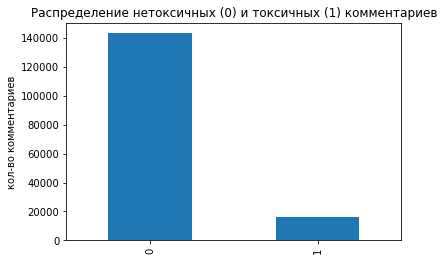

In [ ]:
# проверка структуры баланса классов

comment['toxic'].value_counts().plot(kind='bar')
plt.title("Распределение нетоксичных (0) и токсичных (1) комментариев")
plt.ylabel("кол-во комментариев")
plt.show();

В датасете ярко выражен дисбаланс классов (разница в 7 раз: 20 тыс токсичных против 140 тыс положительных), поэтому на этапе подготовки обучения моделей необходимо это учесть.

### Предобработка данных

**Лемматизация и регулярные выражения**

In [ ]:
# приведем тексты к нижнему регистру

#comment['text'] = comment['text'].apply(lambda x: x.lower())

In [ ]:
# очистим текст от лишних символов

def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = " ".join(text.split())
    return text

In [ ]:
comment['lemm_text'] = comment['text'].apply(clear_text)

In [ ]:
display(comment.head())

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


In [ ]:
# введем функцию РОS-тэгирования слов:

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, # прилагательное
                "N": wordnet.NOUN, # существительное
                "V": wordnet.VERB, # глагол
                "R": wordnet.ADV} # наречие

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
# создадим функцию лемматизации и обработки текстов

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    text = " ".join(text)
    return text

In [ ]:
comment['lemm_text'] = comment['lemm_text'].parallel_apply(lemmatize)

OSError: [Errno 28] No space left on device

In [ ]:
# проверим как отработали функции

display(comment.head())

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


In [ ]:
# оставим только нужные столбцы с лемматизированными и очищенными данными

comment = comment.drop(['text'], axis=1)
display(comment.head())

,toxic,lemm_text
0,0,explanation why the edits made under my userna...
1,0,d aww he matches this background colour i m se...
2,0,hey man i m really not trying to edit war it s...
3,0,more i can t make any real suggestions on impr...
4,0,you sir are my hero any chance you remember wh...


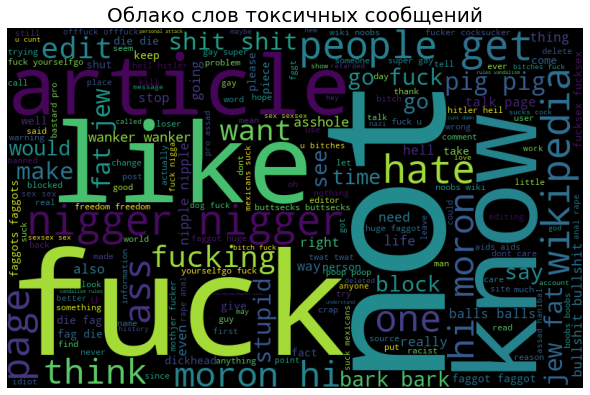

In [ ]:
# визуализируем облако слов в текстах с токсичной коннотацией

stop_words = stopwords.words('english')
stop_words.remove('not')
words_list = comment[comment['toxic']==1]['lemm_text'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Облако слов токсичных сообщений', fontsize=20);

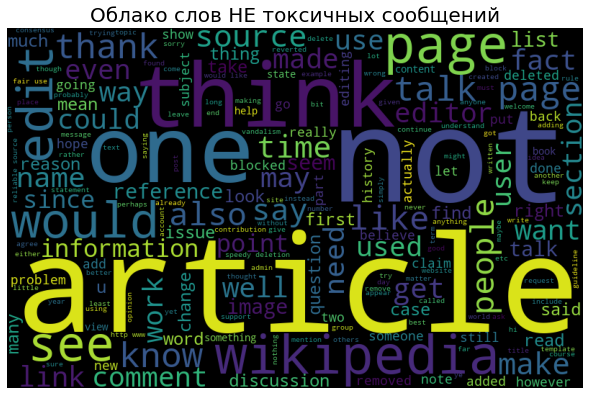

In [ ]:
# визуализируем облако слов в текстах с не токсичной коннотацией

words_list = comment[comment['toxic']==0]['lemm_text'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Облако слов НЕ токсичных сообщений', fontsize=20);

## Обучение

### Решение дисбаланса классов

Так как положительных комментариев значительно больше, то применим метод upsampling.

Oversampling, upsampling — это искусственное увеличение количества объектов минорного класса в датасете до количества объектов мажорного класса.

In [ ]:
# определяем данные на признаки (X) и целевую переменную (y)

X = comment.drop(['toxic'], axis=1)
y = comment['toxic']

In [ ]:
# разделим данные на обучающую и тестовую выборки

RANDOM_STATE = 55

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y, random_state=RANDOM_STATE)

In [ ]:
# проверяем выборки

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(119469, 1)

(39823, 1)

(119469,)

(39823,)

In [ ]:
# определяем функцию upsampling чтобы сбалансировать классы путём увеличения количества объектов минорного класса

#def upsample(features, target, repeat):
#    features_zeros = features[target == 0]
#    features_ones = features[target == 1]
#    target_zeros = target[target == 0]
#    target_ones = target[target == 1]
#    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
#    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
#    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled)
#    return features_upsampled, target_upsampled

In [ ]:
# применяем функцию к обучающей выборке - добавила UP

#X_train_up, y_train_up = upsample(X_train, y_train, repeat=6)
#display(X_train_up.shape)
#display(y_train_up.shape)

In [ ]:
# проверка структуры баланса классов - добавила UP

#y_train_up.hist(label='train')
#y_test.hist(label='test')
#plt.legend()
#plt.title('Проверка структуры баланса классов');

На графике мы видим, что удалось увеличить минорный класс в 4 раза

### Подбор метода векторизации

In [ ]:
# создаем корпус текстов без upsampling

corpus_train = X_train['lemm_text'].values#.astype('U')
corpus_test = X_test['lemm_text'].values#.astype('U')

#- добавила UP (то есть применен upsampling)

#corpus_train_up = X_train_up['lemm_text'].values

**МЕШОК СЛОВ**

Переведём тексты в понятный для машины формат — векторный.

Преобразовать слова в векторы поможет модель «мешок слов» (англ. bag of words). Она преобразует текст в вектор, не учитывая порядок слов. Отсюда и название — «мешок».

In [ ]:
# создаем мешок слов с учётом стоп-слов
stop_words = set(stopwords.words('english'))

count_vect_bow = CountVectorizer(stop_words=list(stop_words)) # dtype='float64'
bow_train = count_vect_bow.fit_transform(corpus_train)
print("Размер мешка слов обучающая выборка:", bow_train.shape)

Размер мешка слов обучающая выборка: (119469, 142792)


In [ ]:
# инициируем модель

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=150)

In [ ]:
# рассчитаем метрику f1 по результатам кросс-валидации

scores = cross_val_score(model,
                         bow_train,
                         y_train,
                         cv=3,
                         scoring='f1')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Метрика F1 по результатам кросс-валидации, мешок слов:', scores.mean().round(2))

Метрика F1 по результатам кросс-валидации, мешок слов: 0.75


**N-ГРАММЫ**

In [ ]:
# создаем n-грамму n_gramm, для которой n=2

count_vect = CountVectorizer(ngram_range=(2, 2))

n_gramm_train = count_vect.fit_transform(corpus_train)

print("Размер n-граммы train:", n_gramm_train.shape)

Размер n-граммы train: (119469, 1767323)


In [ ]:
# рассчитаем метрику f1 по результатам кросс-валидации

scores_ngramm = cross_val_score(model,
                                n_gramm_train,
                                y_train,
                                cv=3,
                                scoring='f1')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print('Метрика F1 по результатам кросс-валидации,  n-граммы:', scores_ngramm.mean().round(2))

Метрика F1 по результатам кросс-валидации,  n-граммы: 0.56


**TF-IDF**

Оценка важности слова определяется величиной TF-IDF (от англ. term frequency, «частота терма, или слова»; inverse document frequency, «обратная частота документа, или текста»). То есть TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе.

In [ ]:
# считаем величину TF-IDF

count_tf_idf = TfidfVectorizer(stop_words=list(stop_words))
tf_idf_train = count_tf_idf.fit_transform(corpus_train) # без upsampling
display(tf_idf_train.shape)

(119469, 142792)

In [ ]:
# рассчитаем метрику f1 по результатам кросс-валидации

scores_tf_idf = cross_val_score(model,
                                tf_idf_train,
                                y_train, # без upsampling
                                cv=5,
                                scoring='f1')

In [ ]:
print('Метрика F1 по результатам кросс-валидации, TF-IDF:', scores_tf_idf.mean().round(2))

Метрика F1 по результатам кросс-валидации, TF-IDF: 0.7


In [ ]:
# Построим таблицу результатов баллансировки
index = ['LR_bow',
         'LR_ngramm',
         'LR_TF-IDF']
data = {'F1 на CV':[scores.mean().round(2),
                    scores_ngramm.mean().round(2),
                    scores_tf_idf.mean().round(2)]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data.sort_values('F1 на CV', ascending=False)

,F1 на CV
LR_bow,0.75
LR_TF-IDF,0.70
LR_ngramm,0.56


По итогам выбора метода векторизации и применения модели Логистической регрессии с расчетом метрики F1, лучший результат показал метод **метод "Мешок слов", метрика F1 = 0,75**

Но модели было мало такое количество итераций, и увеличение их потребляет много ресурсов по времени.

На втором месте по результатам **метод "TF-IDF"**. Этот метод показал результат на втором месте **F1 = 0,70**, при обучении модели никаких сложностей не возникло, поэтому дальнейшее обучение моделей с подбором гиперпараметров будет с этой векторизацией.

На третьем месте стал **"N-грамм"** с метрикой **F1 = 0,56**. Недостатком этого метода является создание достаточно большого размера матрицы, что может увеличить в последствии время обучения модели.


### Выбор модели

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
# создаём пайплайн: подготовка данных и модель

pipeline = make_pipeline(#StandardScaler(),
                           TfidfVectorizer(),
                           RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy='minority'),
DecisionTreeClassifier())

In [ ]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        #'decisiontreeclassifier': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'decisiontreeclassifier__max_depth': range(1,5),
        'decisiontreeclassifier__max_features': range(1,5)
    },

    # словарь для модели LGBM
    {
        'decisiontreeclassifier': [LGBMClassifier(random_state=RANDOM_STATE)],
        'decisiontreeclassifier__learning_rate': [0.1, 0.5],
        #'models__max_depth': range(1,5),
        'decisiontreeclassifier__n_estimators' : range(50, 100, 50)
    },

    # словарь для модели LogisticRegression()
    {
        'decisiontreeclassifier': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1')],
        'decisiontreeclassifier__C': range(1,5)
    },

    # словарь для модели CatBoostClassifier
    {
        'decisiontreeclassifier': [CatBoostClassifier(random_state=RANDOM_STATE)],
        'decisiontreeclassifier__learning_rate':[0.1, 0.5],
        #'models__max_depth': range(1,5),
        'decisiontreeclassifier__n_estimators' : range(50, 100, 50)
    }
]

In [ ]:
# чтобы найти лучшее решение, перебирать будем и гиперпараметры

#grid_search = GridSearchCV(pipeline, param_grid, cv=5)
random_search = RandomizedSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    random_state=RANDOM_STATE,
    n_jobs=-1
    ,verbose=True)

In [ ]:
# убираем ошибки из-за возможно устаревшей версии sklearn

#from warnings import simplefilter
#simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# обучаем на тренировочных данных
random_search.fit(corpus_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('randomoversampler',
                                              RandomOverSampler(random_state=55,
                                                                sampling_strategy='minority')),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions=[{'decisiontreeclassifier__max_depth': range(1, 5),
                                         'decisiontreeclassifier__max_features': rang...
                                        {'decisiontreeclassifier': [LogisticRegression(C=2,
                                                                                       penalty='l1',
                                                                                       random_state=55,
                                                                                       solver='liblinear')],
                                         'decisiontreeclassifier__C': range(1, 5)},
                                        {'decisiontreeclassifier': [<catboost.core.CatBoostClassifier object at 0x7faca0dcdca0>],
                                         'decisiontreeclassifier__learning_rate': [0.1,
                                                                                   0.5],
                                         'decisiontreeclassifier__n_estimators': range(50, 100, 50)}],
                   random_state=55, scoring='f1', verbose=True)

In [ ]:
# выведем лучшие параметры

print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', random_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomoversampler',
                 RandomOverSampler(random_state=55,
                                   sampling_strategy='minority')),
                ('decisiontreeclassifier',
                 LogisticRegression(C=2, penalty='l1', random_state=55,
                                    solver='liblinear'))])
Метрика лучшей модели на кросс-валидации: 0.7702086096354576


### Предсказания на тестовой выборке

In [ ]:
# создадим вектор данных на тестовой выборке методом "TF_IDF"

#tf_idf_test = count_tf_idf.transform(corpus_test)

#print("Размер 'TF_IDF' тестовая выборка:", tf_idf_test.shape)

In [ ]:
# Сохраняем лучшую модель в новую переменную

best_model_grid = random_search.best_estimator_

In [ ]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных

y_test_pred = best_model_grid.predict(corpus_test)

print(f'Метрика F1 на тестовой выборке: {f1_score(y_test, y_test_pred).round(3)}')

Метрика F1 на тестовой выборке: 0.775


## Выводы

Перед нами стояла задача обучить модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Необходимо было построить модель со значением **метрики качества F1 не меньше 0.75**.

**Для построения модели и достижения целевого значения метрики выполнены следующие шаги:**

**1)** Проведено исследование данных: Дубликаты отсутствуют. В датасете ярко выражен дисбаланс классов (разница в 7 раз: 20 тыс токсичных против 140 тыс положительных). Удален дублирующий индексы столбец.

**2)** Произведена лемматизация текста и очистка данных, составлена визуализация самых повторяемых токсичных слов и положительных комментариев

**3)** Применен метод upsampling для устранения дисбаланса классов целевого показателя.

**4)** Выполнен подбор метода векторизации. По итогам выбора метода векторизации и применения модели Логистической регрессии с расчетом метрики F1, лучший результат показал метод метод "Мешок слов", метрика F1 = 0,75

Но модели было мало такое количество итераций, и увеличение их потребляет много ресурсов по времени.

На втором месте по результатам метод "TF-IDF". Этот метод показал результат на втором месте F1 = 0,70, при обучении модели никаких сложностей не возникло, поэтому дальнейшее обучение моделей с подбором гиперпараметров будет с этой векторизацией.

На третьем месте стал "N-грамм" с метрикой F1 = 0,56. Недостатком этого метода является создание достаточно большого размера матрицы, что может увеличить в последствии время обучения модели.

**5)** Для решения задачи использовали 4 модели: DecisionTreeClassifier, LGBMClassifier, LogisticRegression, CatBoostClassifier.

**Лучшая модель с гиперпараметрами оказалась**: Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomoversampler',
                 RandomOverSampler(random_state=55,
                                   sampling_strategy='minority')),
                ('decisiontreeclassifier',
                 LogisticRegression(C=2, penalty='l1', random_state=55,
                                    solver='liblinear'))])
Метрика лучшей модели на кросс-валидации: 0.7702086096354576

**6)** Метрика лучшей модели на тестовой выборке оказалась **F1 = 0.775. Целевое значение достигнуто.**